In [ ]:
from google.colab import drive

In [ ]:
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Installing necessary libarires

In [ ]:
!pip install pandas numpy matplotlib seaborn scikit-learn

In [ ]:
#importing the libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, MinMaxScaler, OneHotEncoder, LabelEncoder
from sklearn.impute import SimpleImputer

## Loading the dataset

In [ ]:
path= '/content/drive/MyDrive/ElevateLabs/task1/Titanic-Dataset.csv'

df= pd.read_csv(path)

## Displaying the basic information about the dataset

In [ ]:
print("Dataset shape:", df.shape)
print("\nFirst 5 rows:")
display(df.head())
print("\nDataset info:")
df.info()
print("\nSummary statistics:")
display(df.describe(include='all'))
print("\nMissing values count:")
display(df.isnull().sum())

Dataset shape: (891, 12)

First 5 rows:


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S



Dataset info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB

Summary statistics:


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
count,891.000000,891.000000,891.000000,891,891,714.000000,891.000000,891.000000,891,891.000000,204,889
unique,NaN,NaN,NaN,891,2,NaN,NaN,NaN,681,NaN,147,3
top,NaN,NaN,NaN,"Dooley, Mr. Patrick",male,NaN,NaN,NaN,347082,NaN,G6,S
freq,NaN,NaN,NaN,1,577,NaN,NaN,NaN,7,NaN,4,644
mean,446.000000,0.383838,2.308642,NaN,NaN,29.699118,0.523008,0.381594,NaN,32.204208,NaN,NaN
std,257.353842,0.486592,0.836071,NaN,NaN,14.526497,1.102743,0.806057,NaN,49.693429,NaN,NaN
min,1.000000,0.000000,1.000000,NaN,NaN,0.420000,0.000000,0.000000,NaN,0.000000,NaN,NaN
25%,223.500000,0.000000,2.000000,NaN,NaN,20.125000,0.000000,0.000000,NaN,7.910400,NaN,NaN
50%,446.000000,0.000000,3.000000,NaN,NaN,28.000000,0.000000,0.000000,NaN,14.454200,NaN,NaN
75%,668.500000,1.000000,3.000000,NaN,NaN,38.000000,1.000000,0.000000,NaN,31.000000,NaN,NaN



Missing values count:


,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,177
SibSp,0
Parch,0
Ticket,0
Fare,0


## Checking missing values

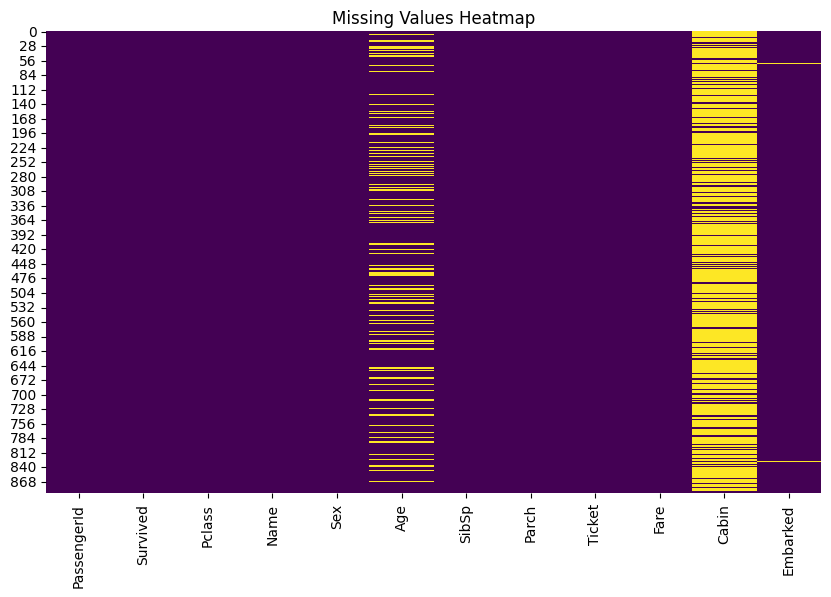

In [ ]:
# Visualize missing values
plt.figure(figsize=(10, 6))
sns.heatmap(df.isnull(), cbar=False, cmap='viridis')
plt.title('Missing Values Heatmap')
plt.show()

In [ ]:
# Handle missing values in Age (numerical) - fill with median
age_median = df['Age'].median()
df['Age'].fillna(age_median, inplace=True)
print(age_median)

28.0


/tmp/ipython-input-2942484555.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Age'].fillna(age_median, inplace=True)


In [ ]:
# Handle missing values in Cabin (categorical) - too many missing, we'll drop this column
df.drop('Cabin', axis=1, inplace=True)

In [ ]:
# Handle missing values in Embarked (categorical) - fill with mode
embarked_mode = df['Embarked'].mode()[0]
df['Embarked'].fillna(embarked_mode, inplace=True)
# print(embarked_mode)

In [ ]:
# Verify if there are remaning missing values
print("Missing values after treatment:")
display(df.isnull().sum())

Missing values after treatment:


,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,0
SibSp,0
Parch,0
Ticket,0
Fare,0


## Converting categorical features

In [ ]:
# Identify categorical columns
categorical_cols = df.select_dtypes(include=['object']).columns
print("Categorical columns:", categorical_cols)

Categorical columns: Index(['Name', 'Sex', 'Ticket', 'Embarked'], dtype='object')


In [ ]:
# One-hot encode 'Sex' and 'Embarked'
df = pd.get_dummies(df, columns=['Sex', 'Embarked'], drop_first=True)

In [ ]:
# Label encode 'Name' (though typically we might drop names or extract titles)
# For demonstration, we'll just label encode
le = LabelEncoder()
df['Name'] = le.fit_transform(df['Name'])

In [ ]:
# Display the transformed dataframe
print("Data after encoding:")
display(df.head())

Data after encoding:


,PassengerId,Survived,Pclass,Name,Age,SibSp,Parch,Ticket,Fare,Sex_male,Embarked_Q,Embarked_S
0,1,0,3,108,22.0,1,0,A/5 21171,7.2500,True,False,True
1,2,1,1,190,38.0,1,0,PC 17599,71.2833,False,False,False
2,3,1,3,353,26.0,0,0,STON/O2. 3101282,7.9250,False,False,True
3,4,1,1,272,35.0,1,0,113803,53.1000,False,False,True
4,5,0,3,15,35.0,0,0,373450,8.0500,True,False,True


## Normalizing/ Standardizing the numerical features

In [ ]:
# Select numerical columns to scale (excluding target 'Survived' and already binary columns)
numerical_cols = ['Age', 'Fare', 'Pclass', 'SibSp', 'Parch']

In [ ]:
# Standardization (mean=0, std=1)
scaler = StandardScaler()
df[numerical_cols] = scaler.fit_transform(df[numerical_cols])

In [ ]:
# Display scaled data
print("Data after standardization:")
display(df.head())

Data after standardization:


,PassengerId,Survived,Pclass,Name,Age,SibSp,Parch,Ticket,Fare,Sex_male,Embarked_Q,Embarked_S
0,1,0,0.827377,108,-0.565736,0.432793,-0.473674,A/5 21171,-0.502445,True,False,True
1,2,1,-1.566107,190,0.663861,0.432793,-0.473674,PC 17599,0.786845,False,False,False
2,3,1,0.827377,353,-0.258337,-0.474545,-0.473674,STON/O2. 3101282,-0.488854,False,False,True
3,4,1,-1.566107,272,0.433312,0.432793,-0.473674,113803,0.420730,False,False,True
4,5,0,0.827377,15,0.433312,-0.474545,-0.473674,373450,-0.486337,True,False,True


## Checking for outliers

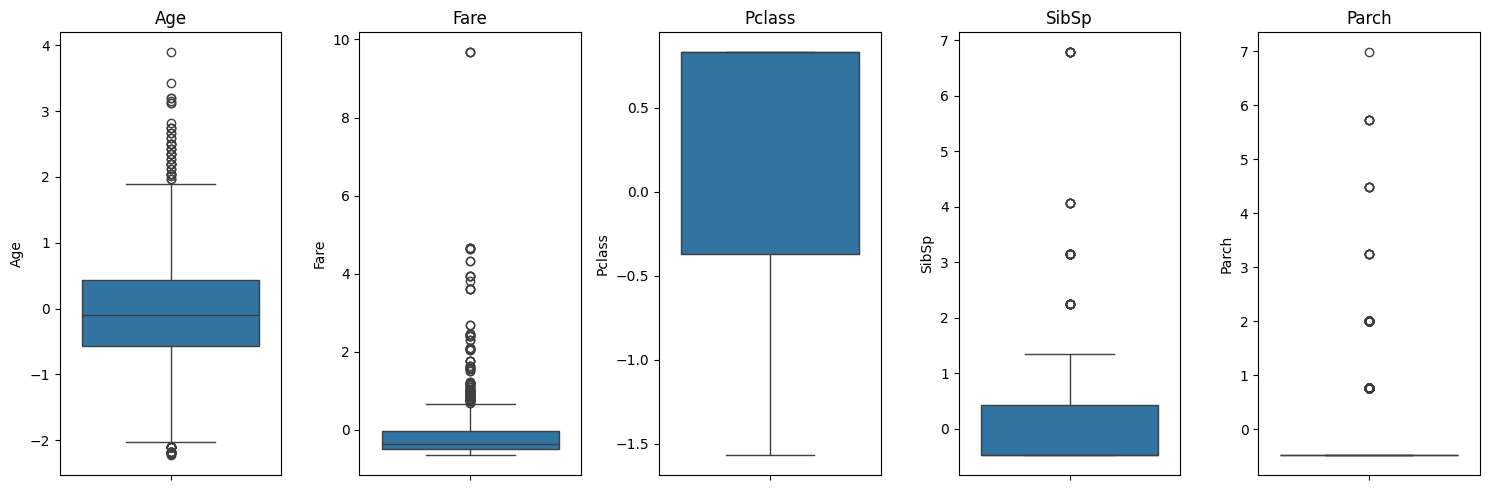

In [ ]:
# Visualize outliers using boxplots
plt.figure(figsize=(15, 5))
for i, col in enumerate(numerical_cols):
    plt.subplot(1, len(numerical_cols), i+1)
    sns.boxplot(y=df[col])
    plt.title(col)
plt.tight_layout()
plt.show()

In [ ]:
# Removing outliers using IQR method
def remove_outliers(df, col):
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return df[(df[col] >= lower_bound) & (df[col] <= upper_bound)]

In [ ]:
# Remove outliers from numerical columns
for col in numerical_cols:
    df = remove_outliers(df, col)

print("Data shape after outlier removal:", df.shape)

Data shape after outlier removal: (577, 12)


## Final dataset preparation

In [ ]:
# Separate features and target
X = df.drop('Survived', axis=1)
Y = df['Survived']

# Display final preprocessed data
print("Final preprocessed data:")
display(X.head())
print("\nTarget variable:")
display(Y.head())

Final preprocessed data:


,PassengerId,Pclass,Name,Age,SibSp,Parch,Ticket,Fare,Sex_male,Embarked_Q,Embarked_S
0,1,0.827377,108,-0.565736,0.432793,-0.473674,A/5 21171,-0.502445,True,False,True
2,3,0.827377,353,-0.258337,-0.474545,-0.473674,STON/O2. 3101282,-0.488854,False,False,True
3,4,-1.566107,272,0.433312,0.432793,-0.473674,113803,0.420730,False,False,True
4,5,0.827377,15,0.433312,-0.474545,-0.473674,373450,-0.486337,True,False,True
5,6,0.827377,554,-0.104637,-0.474545,-0.473674,330877,-0.478116,True,True,False



Target variable:


,Survived
0,0
2,1
3,1
4,0
5,0
